In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [193]:
df = pd.read_csv("../measurements")

df.head()

,Variety,RGB_Image,Depth_Information,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,ID,Week,Date
229,Satine,RGB_1.png,Depth_1.png,2.6,0.14,8.2,12.0,80.6,1,2021-W1,2021-01-04
362,Satine,RGB_2.png,Depth_2.png,2.1,0.10,8.5,8.2,67.4,2,2021-W1,2021-01-04
258,Satine,RGB_3.png,Depth_3.png,2.0,0.09,7.5,9.5,65.0,3,2021-W1,2021-01-04
263,Satine,RGB_4.png,Depth_4.png,2.7,0.13,6.0,10.6,78.7,4,2021-W1,2021-01-04
224,Lugano,RGB_5.png,Depth_5.png,2.3,0.11,8.3,9.8,73.9,5,2021-W1,2021-01-04


In [194]:
def prepare_dataframe(df, variety):
    # remove string from week number
    df['Week'] = df['Week'].str.replace('2021-W', '')
    df['Week'] = pd.to_numeric(df["Week"])

    # splice of unecessary colums and rows
    # df = df.loc[df["Variety"] == variety]
    df = df.loc(axis=1)["FreshWeightShoot", "DryWeightShoot", "Height", "Diameter", "LeafArea", "Week"]


    return df

In [195]:
df = prepare_dataframe(df, "Satine")
df

,FreshWeightShoot,DryWeightShoot,Height,Diameter,LeafArea,Week
229,2.6,0.14,8.2,12.0,80.6,1
362,2.1,0.10,8.5,8.2,67.4,1
258,2.0,0.09,7.5,9.5,65.0,1
263,2.7,0.13,6.0,10.6,78.7,1
224,2.3,0.11,8.3,9.8,73.9,1
...,...,...,...,...,...,...
159,163.2,9.17,16.0,26.0,1858.3,7
160,180.6,10.01,17.0,31.0,1805.6,7
161,209.3,8.19,15.0,25.6,2257.1,7
162,204.5,9.20,18.0,32.0,3179.4,7


In [196]:
X = df.values[:, 0:4]
y = df.values[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [197]:
model_ols =  linear_model.LinearRegression(normalize=True)
model_ols.fit(X_train,y_train)

C:\school\minor-ai\lettuce-cnn\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [198]:
prediction = model_ols.predict(X_test)

In [199]:
def plot_true_vs_predicted(predicted, y, title):
    actual = y
    plt.plot(actual, 'bo')
    plt.plot(predicted, 'r^')

    # Draw lines between the data points
    for x1, y1, x2, y2 in zip(range(len(actual)), actual, range(len(predicted)), predicted):
        plt.plot([x1, x2], [y1, y2], 'k-')

    plt.title(title)
    plt.legend(['True data', 'Predicted data'])
    plt.show()


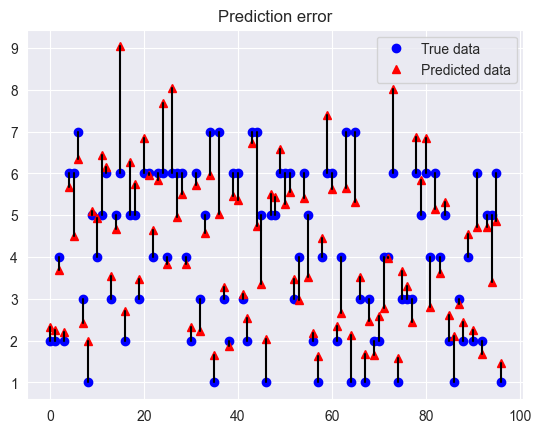

In [200]:
plot_true_vs_predicted(prediction, y_test, "Prediction error")

In [201]:
mean_squared_error(prediction, y_test)

0.8521543241833368